In [1]:
from pipeline_performance_loader import initialization, read_feature
import glob
from collections import defaultdict
import numpy as np
import math
from matplotlib import pyplot as plt

In [2]:
def compute_percentiel(data):
	percentile = []
	for i in [5, 25, 50, 75, 95]:
		percentile.append(np.percentile(data, i))

	return percentile


def bucketize_feature(feature, perf, num_of_bucket=4):
	feature_range = (min(feature), max(feature))
	featuer_list = []
	perf_list = []
	feature_bins = np.logspace(math.log10(feature_range[0]), math.log10(feature_range[1]), num=num_of_bucket+1)
	perf_bucket = defaultdict(list)
	for i in range(len(feature)):
		current_feature = feature[i]
		print(current_feature)
		if current_feature >= feature_bins[-1]:
			current_bin = len(feature_bins) - 1 
		else:
			current_bin = next(x[0] for x in enumerate(feature_bins) 
								if x[1] >= current_feature)

		perf_bucket[feature_bins[current_bin]].append(perf[i])


	return perf_bucket

In [3]:
all_feature_names, moving, video_to_delete, selected_video, glimpse_video_to_delete = initialization()
path = '../feature_analysis/video_features_30s/'
# feature_file = path + 'features_all_type_width_height_filter.csv'
feature_file = path + 'allvideo_features_long_add_width_20_filter.csv'
features = read_feature(feature_file)

driving2_3,0.0,0.0,0,0.0,0.0,0.0,-3.0,0.0,0.0,0.0,0.0,0.0,0.0,nan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017777777777777778,0,0.03079506172839507,0.17548521797688565,10.38655522428052,109.89372638584705,0.03079506172839507,0.0,0.0,0.0,0.0,0.0,2.252728336819822,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.0,0.0,0.0,0.0,0.0,0.0,0.0,nan,0.0,0.0,0

driving2_8,0.0,0.0,0,0.0,0.0,0.0,-3.0,0.0,0.0,0.0,0.0,0.0,0.0,nan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,-3.0,0.0,0.0,0.0,0.0,0.0,0.0,nan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.0,0.0,0.0,0.0,0.0,0.0,0.0,nan,0.0,0.0,0

driving2_27,0.0,0.0,0,0.0,0.0,0.0,-3.0,0.0,0.0,0.0,0.0,0.0,0.0,nan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,-3.0,0.0,0.0,0.0,0.0,0.0,0.0,nan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.0,0.0,0.0,0.0,0.0,0.0,0.0,nan,

In [4]:
# load videostorm and glimpse performance
# load selected videos

def NS_parser(path):
    perf = {}
    with open(path, 'r') as f:
        f.readline()
        for line in f:
            line_list = line.strip().split(',')
            f1 = float(line_list[3])
            bw = float(line_list[4])
            gpu = float(line_list[5])
            perf[line_list[0]] = (gpu, f1, bw)

    return perf

def MS_parser(path):
    perf = {}
    with open(path, 'r') as f:
        f.readline()
        for line in f:
            line_list = line.strip().split(',')
            f1 = float(line_list[2])
            gpu = float(line_list[3])
            easy_frame = float(line_list[4])
            perf[line_list[0]] = (gpu, f1, easy_frame)		
    return perf

noscope_path = '../noscope/results/Noscope_overfitting_result_allvideo_w_gpu_cost_min_gpu.csv'
noscope_perf = NS_parser(noscope_path)
modelselection_path = '../model_selection/results/model_selection_overfitting_mergelabel.csv'
modelselection_perf = MS_parser(modelselection_path)



In [5]:
# load selected videos for GL and VS
selected_video_path = './video_selection_results/'
selected_videos = []
with open(selected_video_path + 'no_video_selection.csv', 'r') as f:
    f.readline()
    for line in f:
        line_list = line.strip().split(',')
        if line_list[3] == '':
            break
        selected_videos.append(line_list[3])
        
print(selected_videos)

['crossroad2_63', 'drift_2', 'drift_4', 'drift_7', 'drift_8', 'drift_13', 'drift_17', 'drift_19', 'drift_23', 'drift_27', 'drift_28', 'drift_33', 'drift_37', 'drift_38', 'driving1_6', 'driving1_7', 'driving1_8', 'driving1_11', 'driving1_12', 'driving1_13', 'driving1_14', 'driving2_12', 'driving_downtown_25', 'jp_8', 'jp_12', 'jp_22', 'jp_34', 'nyc_2', 'park_0', 'park_3', 'park_12', 'park_13', 'park_15', 'park_16', 'park_17', 'park_20', 'park_23', 'park_29']


In [11]:
perf1 = []
perf2 = []
feature1 = []
feature2 = []
for key in selected_videos:
    if key not in features or key not in noscope_perf or key not in modelselection_perf:
        continue
    feature1.append(features[key][all_feature_names.index('object_size_percentile10')])
    feature2.append(features[key][all_feature_names.index('arrival_rate_second_moment')])
    perf1.append(noscope_perf[key][0])
    perf2.append(modelselection_perf[key][0])

0.0030381944444444445
0.0038856336805555554
0.003977864583333333
0.003901041666666667
0.0040625
0.004288194444444444
0.003782660590277778
0.0036277126736111113
0.0036963975694444444
0.0037493489583333333
0.003564670138888889
0.004366753472222222
0.004067708333333334
0.0036953125
0.0023394097222222223
0.0020616319444444445
0.002185329861111111
0.0022265625
0.0020475260416666667
0.0023919270833333336
0.0020247395833333333
0.005473090277777778
0.0022688802083333333
0.00365234375
0.0038085937499999995
0.0037955729166666667
0.003738064236111111
0.0021909722222222226
0.0022808159722222223
0.0023489583333333335
0.0025017361111111113
0.0029832899305555554
0.0022706163194444445
0.0030104166666666664
0.0023697916666666667
0.004232204861111111
0.0023311631944444443
0.002518446180555556
0.0030381944444444445
0.0038856336805555554
0.003977864583333333
0.003901041666666667
0.0040625
0.004288194444444444
0.003782660590277778
0.0036277126736111113
0.0036963975694444444
0.0037493489583333333
0.00356467

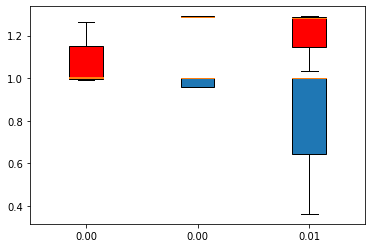

In [12]:
feature = feature1
vs_perf_bucket = bucketize_feature(feature, perf1)
gl_perf_bccket = bucketize_feature(feature, perf2)
fig, ax = plt.subplots()
vs_all_percentile = []
gl_all_percentile = []
xticks =  []
for key in sorted(vs_perf_bucket.keys())[1:]:
    xticks.append(format(key, '02.2f'))
    current_perf = vs_perf_bucket[key]
    percentile = compute_percentiel(current_perf)
    vs_all_percentile.append(percentile)
    current_perf = gl_perf_bccket[key]
    percentile = compute_percentiel(current_perf)
    gl_all_percentile.append(percentile)
ax.boxplot(gl_all_percentile,showfliers=False, patch_artist=True)
bp = ax.boxplot(vs_all_percentile,showfliers=False, patch_artist=True)
for patch in bp['boxes']:
    patch.set(facecolor='r') 
plt.xticks(np.arange(1, len(vs_all_percentile) + 1), xticks)      
plt.show()




2.441377777777778
0.6366666666666668
0.322383950617284
0.7055555555555554
0.4533333333333333
1.5733333333333337
0.7070061728395063
0.9090666666666669
0.5822222222222222
0.2966666666666666
0.13111111111111112
0.2088888888888889
0.6366666666666669
0.7177777777777781
0.5330999999999999
13.264572839506169
11.477777777777778
29.174166666666668
10.682350617283952
2.6070913580246917
3.5753320987654322
0.15
3.2856098765432105
3.3899999999999997
3.384902469135802
1.738720987654321
4.666488888888889
3.094788888888888
0.2644444444444445
0.24154444444444453
0.4443691358024691
3.088888888888889
1.8869135802469135
0.34
1.05
0.16199506172839503
0.5311111111111112
1.026666666666667
2.441377777777778
0.6366666666666668
0.322383950617284
0.7055555555555554
0.4533333333333333
1.5733333333333337
0.7070061728395063
0.9090666666666669
0.5822222222222222
0.2966666666666666
0.13111111111111112
0.2088888888888889
0.6366666666666669
0.7177777777777781
0.5330999999999999
13.264572839506169
11.477777777777778
29.

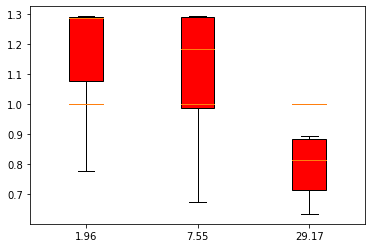

In [13]:
feature = feature2
vs_perf_bucket = bucketize_feature(feature, perf1)
gl_perf_bccket = bucketize_feature(feature, perf2)
fig, ax = plt.subplots()
vs_all_percentile = []
gl_all_percentile = []
xticks =  []
for key in sorted(vs_perf_bucket.keys())[1:]:
    xticks.append(format(key, '02.2f'))
    current_perf = vs_perf_bucket[key]
    percentile = compute_percentiel(current_perf)
    vs_all_percentile.append(percentile)
    current_perf = gl_perf_bccket[key]
    percentile = compute_percentiel(current_perf)
    gl_all_percentile.append(percentile)
ax.boxplot(gl_all_percentile,showfliers=False, patch_artist=True)
bp = ax.boxplot(vs_all_percentile,showfliers=False, patch_artist=True)
for patch in bp['boxes']:
    patch.set(facecolor='r') 
plt.xticks(np.arange(1, len(vs_all_percentile) + 1), xticks)      
plt.show()



(0, 0.006)

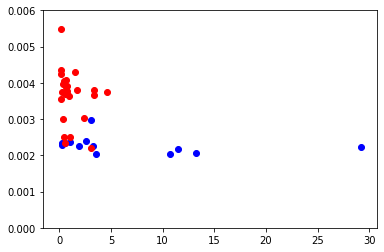

In [17]:
for i in range(len(feature1)):
    if perf1[i] > perf2[i]:
        plt.scatter(feature2[i], feature1[i], c = 'r')
    if perf1[i] < perf2[i]:
        plt.scatter(feature2[i], feature1[i], c = 'b')
plt.ylim(0, 0.006)